In [64]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
file_path = '/content/drive/My Drive/Datasets/D3.csv'
dataset = pd.read_csv(file_path)

In [66]:
#dataset variables for training
x1 = dataset.values[:, 0]
x2 = dataset.values[:, 1]
x3 = dataset.values[:, 2]
y = dataset.values[:, 3]
#inputs required
inputs = [x1,x2,x3]
m = len(Y)
n = [len(x1), len(x2), len(x3)]

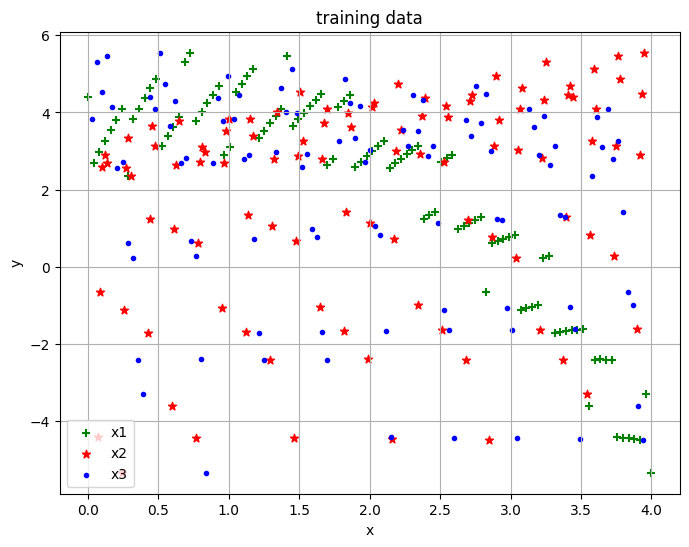

In [67]:
plt.scatter(x1, Y, color='green', marker='+', label="x1")
plt.scatter(x2, Y, color='red', marker='*', label="x2")
plt.scatter(x3, Y, color='blue', marker='.', label="x3")
# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (8, 6) #size of portrait
plt.xlabel('x') #label for X axis
plt.ylabel('y') #label for Y axis
plt.title('training data') #title of plot
plt.legend(loc="best")

# command to show the plot
plt.show()

In [68]:

def reshapeInputs(X, m):
  X_1 = X.reshape(m, 1)
  return X_1

for i in range(len(inputs)):
  inputs[i - 1] = reshapeInputs(inputs[i - 1],m)
X_0 = np.ones((m, 1))
X_t = np.hstack((x_0, inputs[0], inputs[1], inputs[2]))

In [69]:
#Parameters:

def comp_Cost(x, y, theta):
  #linear regression parameters
  #x is 2d array
  #m = num of training ex
  #n = num of features
  #y is 1d array
  #return j which is the scalar value

  predict = x.dot(theta) #predicting theta value
  error = np.subtract(predict, y)
  sqrError = np.square(error)
  J = 1 / (2 * m) * np.sum(sqrError)
  return J

In [70]:
def gradient_descent(x, y, theta, alpha, iteration):
  #linear regression parameters
  #x is 2d array
  #m = num of training ex
  #n = num of features
  #y is 1d array
  #return j which is the scalar value
  #theta = array of fitting parameters
  #alpha = learning rate
  #iterations = number of iterations
  #theta is returned with updated values and cost_history is returned which contains the cost for iterations

  m = len(Y)
  cost_history = np.zeros(iteration)


  for i in range(iteration):
        predict = x.dot(theta)
        error = np.subtract(predict, y)
        sumDelta = (alpha / m) * x.transpose().dot(error)
        theta = theta - sumDelta;
        cost_history[i] = comp_Cost(x, y, theta)

  return theta, cost_history

In [71]:
theta = np.zeros(4)
iteration = 1500 #how many iterations are performed
alpha = 0.025 #value of alpha
inputs[0][:5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [74]:
theta, cost_history = gradient_descent(X_t, Y, theta, alpha, iteration)
print('Final value of theta1 =', theta)

print('cost_history_x1 =', cost_history)

Final value of theta1 = [ 5.31125422 -2.00330777  0.53304468 -0.26517489]
cost_history_x1 = [0.73926575 0.73926176 0.73925779 ... 0.7384647  0.7384647  0.73846469]


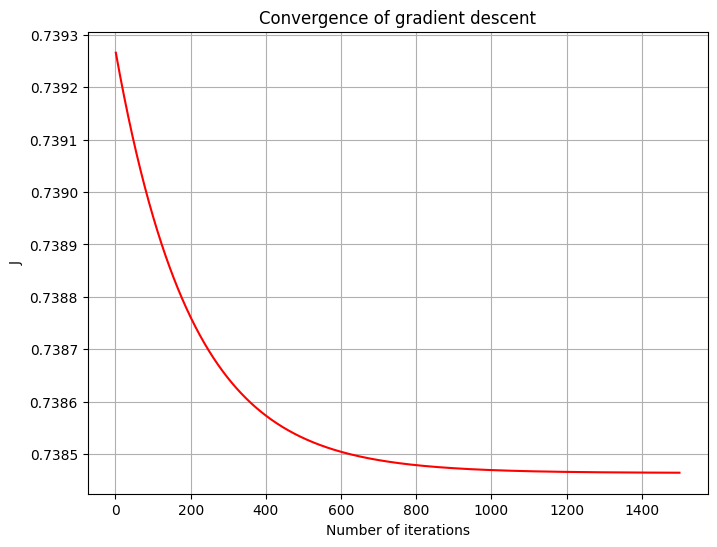

In [75]:
plt.plot(range(1, iteration + 1), cost_history, color='red')
plt.rcParams["figure.figsize"] = (8, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('J')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [78]:
#Predicitions formula with set of 3 arrays
#predict for x1,x2,x3
#uses plot above


test_case = [[1, 1, 1], [2, 0, 4], [3, 2, 1]]
Y_predict = np.zeros(len(test_cases))
for i in range(len(test_cases)):
  for j in range(len(test_cases[i])):
    Y_predict[i] += (test_cases[i][j] * theta[j + 1])
  Y_predict[i] += theta[0]
  print("Y prediction for test case ", (i + 1), ": ", Y_predict[i])

Y prediction for test case  1 :  3.5758162498078336
Y prediction for test case  2 :  0.24393914394986727
Y prediction for test case  3 :  0.10224540268385862
